**16S plots rarefaction**

In [1]:
#  import libs
import numpy as np
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from pandas import read_csv, DataFrame
from tqdm import tqdm
from subprocess import call
from Bio.SeqIO import parse
from skbio.stats.composition import clr 
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [16]:
v3_v4_otu_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/rarefaction_plots_ipynb/pool_rarefaction_tables/V3_V4_OTU_count_long_table.csv', sep ='\t')
v3_v4_g_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/rarefaction_plots_ipynb/pool_rarefaction_tables/V3_V4_Genus_count_long_table.csv', sep ='\t')
v3_v4_s_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/rarefaction_plots_ipynb/pool_rarefaction_tables/V3_V4_Species_count_long_table.csv', sep ='\t')
v1_v9_otu_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/rarefaction_plots_ipynb/pool_rarefaction_tables/V1_V9_OTU_count_long_table.csv', sep ='\t')
v1_v9_g_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/rarefaction_plots_ipynb/pool_rarefaction_tables/V1_V9_Genus_count_long_table.csv', sep ='\t')
v1_v9_s_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/rarefaction_plots_ipynb/pool_rarefaction_tables/V1_V9_Species_count_long_table.csv', sep ='\t')

In [17]:
v3_v4_otu_table

,OTU_count_nonzero,sample_name,number_of_reads
0,10,V3_V4_1,100
1,10,V3_V4_2,100
2,10,V3_V4_R1,100
3,10,V3_V4_3,100
4,10,V3_V4_R3,100
...,...,...,...
109,21,V3_V4_2,700000
110,19,V3_V4_1,700000
111,31,V3_V4_R1,700000
112,31,V3_V4_R2,700000


In [14]:
if 'R' in str(v3_v4_otu_table['sample_name']):
    mean_repl = [v3_v4_otu_table.groupby('number_of_reads')['OTU_count_nonzero'].mean()]
else:
    mean_sample = [v3_v4_otu_table.groupby('number_of_reads')['OTU_count_nonzero'].mean()]
mean_repl

KeyError: 'Column not found: OTU_count_nonzero'

In [ ]:
palette_6colors_v3_v4 = ['#fd5901','#f78104','#faab36','#249ea0','#008083','#005f60']
palette_6colors_v1_v9 = ['#a8e8f9','#00537a','#013c58','#f5a201','#ffba42','#ffd35b']

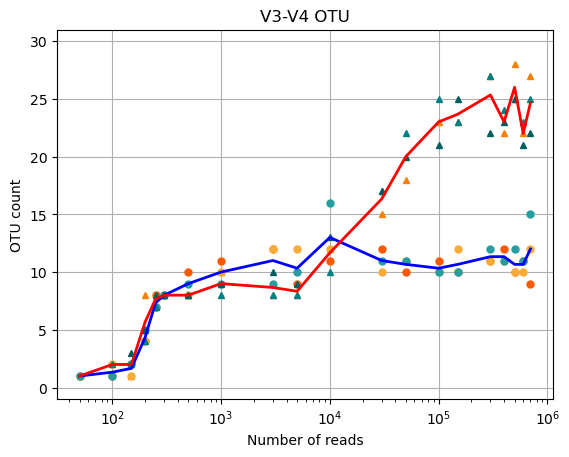

In [113]:
fig1,ax1 = plt.subplots()
for sample,color1 in zip(v3_v4_otu_table['sample_name'].unique(), palette_6colors_v3_v4):
        subset = v3_v4_otu_table[v3_v4_otu_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax1.plot(subset['number_of_reads'], subset['OTU_count_nonzero'], marker='^', markersize=5, linestyle='None', label=sample, color =color1)
        else:
            ax1.plot(subset['number_of_reads'], subset['OTU_count_nonzero'], marker='o', markersize=5, linestyle='None', label=sample, color =color1)
ax1.plot(v3_v4_otu_table['number_of_reads'].unique(), mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax1.plot(v3_v4_otu_table['number_of_reads'].unique(), mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax1.set_xlabel('Number of reads'),
ax1.set_ylabel('OTU count')
ax1.set_title('V3-V4 OTU')
ax1.set_ylim(-1,31)
ax1.set_xscale('log')
plt.grid()

In [96]:
v3_v4_repl_subset = v3_v4_otu_table[v3_v4_otu_table['sample_name'].str.contains('R')]
v3_v4_sample_subset = v3_v4_otu_table[~v3_v4_otu_table['sample_name'].str.contains('R')]

In [107]:
mean_repl = v3_v4_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
mean_repl

number_of_reads
50         1.000000
100        2.000000
150        2.000000
200        5.666667
250        7.666667
300        8.000000
500        8.000000
1000       9.000000
3000       8.666667
5000       8.333333
10000     11.666667
30000     16.333333
50000     20.000000
100000    23.000000
150000    23.666667
300000    25.333333
400000    23.000000
500000    26.000000
600000    22.000000
700000    24.666667
Name: OTU_count_nonzero, dtype: float64

In [108]:
mean_sample = v3_v4_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
mean_sample

number_of_reads
50         1.000000
100        1.333333
150        1.666667
200        4.333333
250        7.333333
300        8.000000
500        9.000000
1000      10.000000
3000      11.000000
5000      10.333333
10000     13.000000
30000     11.000000
50000     10.666667
100000    10.333333
150000    10.666667
300000    11.333333
400000    11.333333
500000    10.666667
600000    10.666667
700000    12.000000
Name: OTU_count_nonzero, dtype: float64

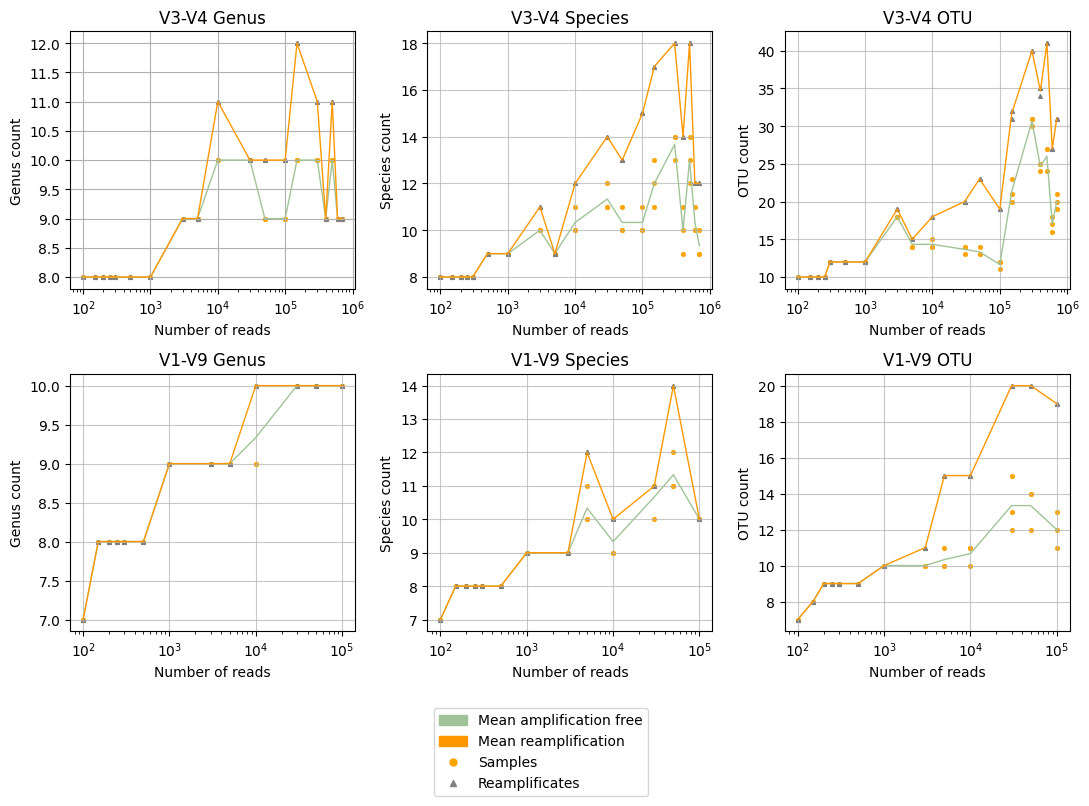

In [24]:
fig, ax = plt.subplots(2,3, figsize=(11,7))
for sample in v3_v4_g_table['sample_name'].unique():
        subset = v3_v4_g_table[v3_v4_g_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'], marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[0,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'], marker='o', s=7, label=sample, color = 'orange')
v3_v4_g_repl_subset = v3_v4_g_table[v3_v4_g_table['sample_name'].str.contains('R')]
v3_v4_g_sample_subset = v3_v4_g_table[~v3_v4_g_table['sample_name'].str.contains('R')]
v3_v4_g_mean_repl = v3_v4_g_repl_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
v3_v4_g_mean_sample = v3_v4_g_sample_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ax[0,0].plot(v3_v4_g_table['number_of_reads'].unique(), v3_v4_g_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,0].plot(v3_v4_g_table['number_of_reads'].unique(), v3_v4_g_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,0].set_xlabel('Number of reads')
ax[0,0].set_ylabel('Genus count')
ax[0,0].set_title('V3-V4 Genus')
ax[0,0].set_xscale('log')
ax[0,0].grid()

for sample in v3_v4_s_table['sample_name'].unique():
        subset = v3_v4_s_table[v3_v4_s_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'], marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[0,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'], marker='o', s=7, label=sample, color = 'orange')
v3_v4_s_repl_subset = v3_v4_s_table[v3_v4_s_table['sample_name'].str.contains('R')]
v3_v4_s_sample_subset = v3_v4_s_table[~v3_v4_s_table['sample_name'].str.contains('R')]
v3_v4_s_mean_repl = v3_v4_s_repl_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
v3_v4_s_mean_sample = v3_v4_s_sample_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ax[0,1].plot(v3_v4_s_table['number_of_reads'].unique(), v3_v4_s_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,1].plot(v3_v4_s_table['number_of_reads'].unique(), v3_v4_s_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,1].set_xlabel('Number of reads')
ax[0,1].set_ylabel('Species count')
ax[0,1].set_title('V3-V4 Species')

ax[0,1].set_xscale('log')
ax[0,1].grid(alpha=0.7)

for sample in v3_v4_otu_table['sample_name'].unique():
        subset = v3_v4_otu_table[v3_v4_otu_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'], marker='^', s=7, label=sample, color ='gray')
        else:
            ax[0,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'], marker='o', s=7, label=sample, color ='orange')
v3_v4_otu_repl_subset = v3_v4_otu_table[v3_v4_otu_table['sample_name'].str.contains('R')]
v3_v4_otu_sample_subset = v3_v4_otu_table[~v3_v4_otu_table['sample_name'].str.contains('R')]
v3_v4_otu_mean_repl = v3_v4_otu_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
v3_v4_otu_mean_sample = v3_v4_otu_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ax[0,2].plot(v3_v4_otu_table['number_of_reads'].unique(), v3_v4_otu_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,2].plot(v3_v4_otu_table['number_of_reads'].unique(), v3_v4_otu_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,2].set_xlabel('Number of reads'),
ax[0,2].set_ylabel('OTU count')
ax[0,2].set_title('V3-V4 OTU')

ax[0,2].set_xscale('log')
ax[0,2].grid(alpha=0.7)


for sample in v1_v9_g_table['sample_name'].unique():
        subset = v1_v9_g_table[v1_v9_g_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='^', s=7, label=sample, color='gray')
        else:
            ax[1,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='o', s=7, label=sample, color='orange')
v1_v9_g_repl_subset = v1_v9_g_table[v1_v9_g_table['sample_name'].str.contains('R')]
v1_v9_g_sample_subset = v1_v9_g_table[~v1_v9_g_table['sample_name'].str.contains('R')]
v1_v9_g_mean_repl = v1_v9_g_repl_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
v1_v9_g_mean_sample = v1_v9_g_sample_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ax[1,0].plot(v1_v9_g_table['number_of_reads'].unique(), v1_v9_g_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,0].plot(v1_v9_g_table['number_of_reads'].unique(), v1_v9_g_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[1,0].set_xlabel('Number of reads')
ax[1,0].set_ylabel('Genus count')
ax[1,0].set_title('V1-V9 Genus')
ax[1,0].set_xscale('log')
ax[1,0].grid(alpha=0.7)

for sample in v1_v9_s_table['sample_name'].unique():
        subset = v1_v9_s_table[v1_v9_s_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='^', s=7, label=sample, color='gray')
        else:
            ax[1,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='o', s=7, label=sample, color='orange')
v1_v9_s_repl_subset = v1_v9_s_table[v1_v9_s_table['sample_name'].str.contains('R')]
v1_v9_s_sample_subset = v1_v9_s_table[~v1_v9_s_table['sample_name'].str.contains('R')]
v1_v9_s_mean_repl = v1_v9_s_repl_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
v1_v9_s_mean_sample = v1_v9_s_sample_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ax[1,1].plot(v1_v9_s_table['number_of_reads'].unique(), v1_v9_s_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,1].plot(v1_v9_s_table['number_of_reads'].unique(), v1_v9_s_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[1,1].set_xlabel('Number of reads')
ax[1,1].set_ylabel('Species count')
ax[1,1].set_title('V1-V9 Species')
ax[1,1].set_xscale('log')
ax[1,1].grid(alpha=0.7)

for sample in v1_v9_otu_table['sample_name'].unique():
        subset = v1_v9_otu_table[v1_v9_otu_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[1,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='o', s=7, label=sample, color = 'orange')
v1_v9_otu_repl_subset = v1_v9_otu_table[v1_v9_otu_table['sample_name'].str.contains('R')]
v1_v9_otu_sample_subset = v1_v9_otu_table[~v1_v9_otu_table['sample_name'].str.contains('R')]
v1_v9_otu_mean_repl = v1_v9_otu_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
v1_v9_otu_mean_sample = v1_v9_otu_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ax[1,2].plot(v1_v9_otu_table['number_of_reads'].unique(), v1_v9_otu_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,2].plot(v1_v9_otu_table['number_of_reads'].unique(), v1_v9_otu_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[1,2].set_xlabel('Number of reads')
ax[1,2].set_ylabel('OTU count')
ax[1,2].set_title('V1-V9 OTU')
ax[1,2].set_xscale('log')
ax[1,2].grid(alpha=0.7)

legend = mpatches.Patch(color='#A1C398', label='Mean amplification free')
legend2 = mpatches.Patch(color='#FF9800', label='Mean reamplification')
lines_sample = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize = 5, label='Samples')
lines_repl = mlines.Line2D([], [], color='gray', marker='^', linestyle='None', markersize = 5, label='Reamplificates')
plt.tight_layout()
fig.legend(handles=[legend, legend2,lines_sample,lines_repl], bbox_to_anchor=(0.6, -0.01))

fig.savefig("16S_refraction_log_POOL.pdf",format="pdf", bbox_inches="tight")
fig.savefig("16S_refraction_log_POOL.png", dpi=800, format="png", bbox_inches='tight')
fig.show()

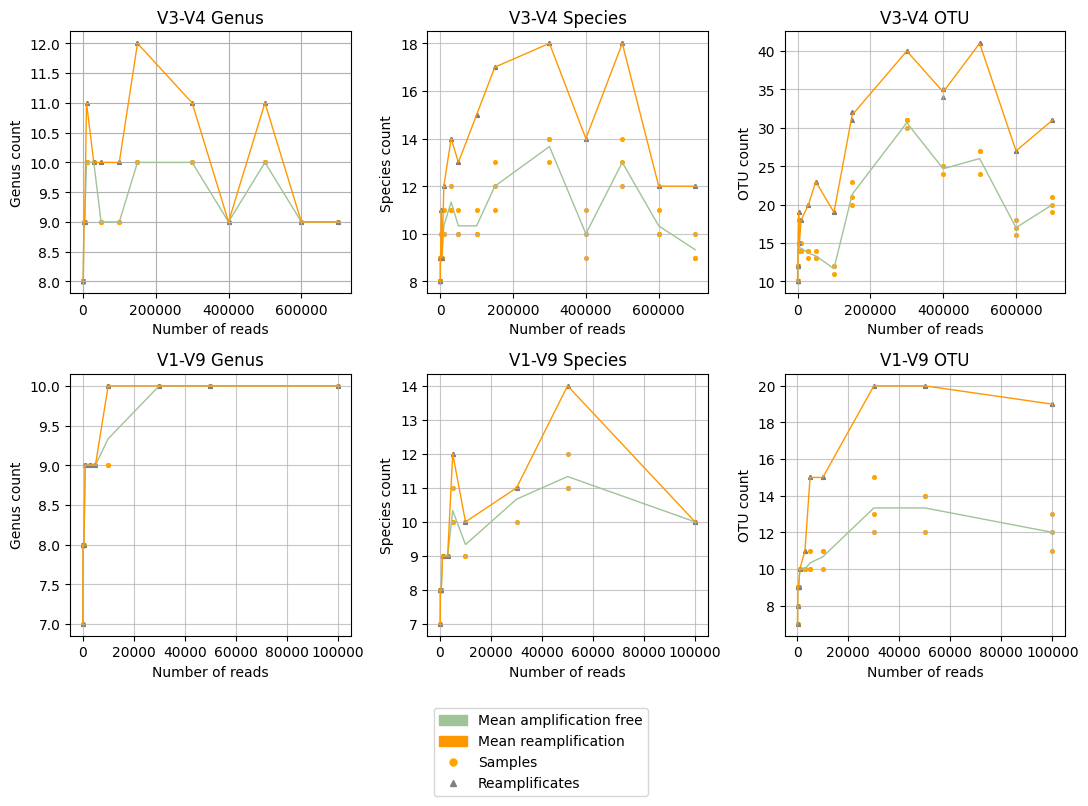

In [25]:
fig, ax = plt.subplots(2,3, figsize=(11,7))
for sample in v3_v4_g_table['sample_name'].unique():
        subset = v3_v4_g_table[v3_v4_g_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'], marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[0,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'], marker='o', s=7, label=sample, color = 'orange')
v3_v4_g_repl_subset = v3_v4_g_table[v3_v4_g_table['sample_name'].str.contains('R')]
v3_v4_g_sample_subset = v3_v4_g_table[~v3_v4_g_table['sample_name'].str.contains('R')]
v3_v4_g_mean_repl = v3_v4_g_repl_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
v3_v4_g_mean_sample = v3_v4_g_sample_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ax[0,0].plot(v3_v4_g_table['number_of_reads'].unique(), v3_v4_g_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,0].plot(v3_v4_g_table['number_of_reads'].unique(), v3_v4_g_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,0].set_xlabel('Number of reads')
ax[0,0].set_ylabel('Genus count')
ax[0,0].set_title('V3-V4 Genus')
#ax[0,0].set_xscale('log')
ax[0,0].grid()

for sample in v3_v4_s_table['sample_name'].unique():
        subset = v3_v4_s_table[v3_v4_s_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'], marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[0,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'], marker='o', s=7, label=sample, color = 'orange')
v3_v4_s_repl_subset = v3_v4_s_table[v3_v4_s_table['sample_name'].str.contains('R')]
v3_v4_s_sample_subset = v3_v4_s_table[~v3_v4_s_table['sample_name'].str.contains('R')]
v3_v4_s_mean_repl = v3_v4_s_repl_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
v3_v4_s_mean_sample = v3_v4_s_sample_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ax[0,1].plot(v3_v4_s_table['number_of_reads'].unique(), v3_v4_s_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,1].plot(v3_v4_s_table['number_of_reads'].unique(), v3_v4_s_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,1].set_xlabel('Number of reads')
ax[0,1].set_ylabel('Species count')
ax[0,1].set_title('V3-V4 Species')
#ax[0,1].set_xscale('log')
ax[0,1].grid(alpha=0.7)

for sample in v3_v4_otu_table['sample_name'].unique():
        subset = v3_v4_otu_table[v3_v4_otu_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'], marker='^', s=7, label=sample, color ='gray')
        else:
            ax[0,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'], marker='o', s=7, label=sample, color ='orange')
v3_v4_otu_repl_subset = v3_v4_otu_table[v3_v4_otu_table['sample_name'].str.contains('R')]
v3_v4_otu_sample_subset = v3_v4_otu_table[~v3_v4_otu_table['sample_name'].str.contains('R')]
v3_v4_otu_mean_repl = v3_v4_otu_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
v3_v4_otu_mean_sample = v3_v4_otu_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ax[0,2].plot(v3_v4_otu_table['number_of_reads'].unique(), v3_v4_otu_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,2].plot(v3_v4_otu_table['number_of_reads'].unique(), v3_v4_otu_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,2].set_xlabel('Number of reads'),
ax[0,2].set_ylabel('OTU count')
ax[0,2].set_title('V3-V4 OTU')
#ax[0,2].set_xscale('log')
ax[0,2].grid(alpha=0.7)


for sample in v1_v9_g_table['sample_name'].unique():
        subset = v1_v9_g_table[v1_v9_g_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='^', s=7, label=sample, color='gray')
        else:
            ax[1,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='o', s=7, label=sample, color='orange')
v1_v9_g_repl_subset = v1_v9_g_table[v1_v9_g_table['sample_name'].str.contains('R')]
v1_v9_g_sample_subset = v1_v9_g_table[~v1_v9_g_table['sample_name'].str.contains('R')]
v1_v9_g_mean_repl = v1_v9_g_repl_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
v1_v9_g_mean_sample = v1_v9_g_sample_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ax[1,0].plot(v1_v9_g_table['number_of_reads'].unique(), v1_v9_g_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,0].plot(v1_v9_g_table['number_of_reads'].unique(), v1_v9_g_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[1,0].set_xlabel('Number of reads')
ax[1,0].set_ylabel('Genus count')
ax[1,0].set_title('V1-V9 Genus')
#ax[1,0].set_xscale('log')
ax[1,0].grid(alpha=0.7)

for sample in v1_v9_s_table['sample_name'].unique():
        subset = v1_v9_s_table[v1_v9_s_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='^', s=7, label=sample, color='gray')
        else:
            ax[1,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='o', s=7, label=sample, color='orange')
v1_v9_s_repl_subset = v1_v9_s_table[v1_v9_s_table['sample_name'].str.contains('R')]
v1_v9_s_sample_subset = v1_v9_s_table[~v1_v9_s_table['sample_name'].str.contains('R')]
v1_v9_s_mean_repl = v1_v9_s_repl_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
v1_v9_s_mean_sample = v1_v9_s_sample_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ax[1,1].plot(v1_v9_s_table['number_of_reads'].unique(), v1_v9_s_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,1].plot(v1_v9_s_table['number_of_reads'].unique(), v1_v9_s_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[1,1].set_xlabel('Number of reads')
ax[1,1].set_ylabel('Species count')
ax[1,1].set_title('V1-V9 Species')
#ax[1,1].set_xscale('log')
ax[1,1].grid(alpha=0.7)

for sample in v1_v9_otu_table['sample_name'].unique():
        subset = v1_v9_otu_table[v1_v9_otu_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[1,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='o', s=7, label=sample, color = 'orange')
v1_v9_otu_repl_subset = v1_v9_otu_table[v1_v9_otu_table['sample_name'].str.contains('R')]
v1_v9_otu_sample_subset = v1_v9_otu_table[~v1_v9_otu_table['sample_name'].str.contains('R')]
v1_v9_otu_mean_repl = v1_v9_otu_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
v1_v9_otu_mean_sample = v1_v9_otu_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ax[1,2].plot(v1_v9_otu_table['number_of_reads'].unique(), v1_v9_otu_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,2].plot(v1_v9_otu_table['number_of_reads'].unique(), v1_v9_otu_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[1,2].set_xlabel('Number of reads')
ax[1,2].set_ylabel('OTU count')
ax[1,2].set_title('V1-V9 OTU')
#ax[1,2].set_xscale('log')
ax[1,2].grid(alpha=0.7)

legend = mpatches.Patch(color='#A1C398', label='Mean amplification free')
legend2 = mpatches.Patch(color='#FF9800', label='Mean reamplification')
lines_sample = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize = 5, label='Samples')
lines_repl = mlines.Line2D([], [], color='gray', marker='^', linestyle='None', markersize = 5, label='Reamplificates')
plt.tight_layout()
fig.legend(handles=[legend, legend2,lines_sample,lines_repl], bbox_to_anchor=(0.6, -0.01))

fig.savefig("16S_refraction_nolog_POOL.pdf",format="pdf", bbox_inches="tight")
fig.savefig("16S_refraction_nolog_POOL.png", dpi=800, format="png", bbox_inches='tight')
fig.show()